In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc # for font
# from matplotlib import font_manager
# from matplotlib.ticker import FormatStrFormatter
import os
import pandas as pd
import re # For getting number from a string
import seaborn as sns
# from palettable.colorbrewer.sequential import Blues_9_r
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker

%matplotlib inline

/sw/apps/python3/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_number(filename):
    num_str = filename.split('_')[-1].split('.')[0]
    num_str = ''.join(filter(str.isdigit, num_str))
    return int(num_str)

In [51]:
# Paths
parent_dir = "/projects/epibolyImg_jstark/ModAndSim/student_project_paramOpt/git_clone_parameter_search_morphogen_gradient/diffusion_1D_line/build/"
input_folder = "output_1D_SDD"
path_to_files = parent_dir + "/" + input_folder + "/gradients/"
path_plot_output = "/projects/epibolyImg_jstark/ModAndSim/student_project_paramOpt/git_clone_parameter_search_morphogen_gradient/plots/plots_gradients/"

In [56]:
# Get max concentration to normalize plot
# Fetch all files in path
fileNames = os.listdir(path_to_files)
# Filter file name list
fileNames = [file for file in fileNames if 'gradient' in file]
# Sort file names by number
fileNames = sorted(fileNames, key=get_number)
# Determine the maximum iteration
iterations = [int(re.findall(r'\d+', file)[0]) for file in fileNames]
iter_max = np.max(iterations)

file_tmax = 'gradient_' + str(iter_max) + '.csv'
gradient_tmax = np.genfromtxt(path_to_files + "/" + file_tmax, delimiter=',')
c_max = np.max(gradient_tmax[:,1])
print("c_max = ", c_max)

dt = 0.000125976
dx = 0.031746
j_min = 0
j_max = -1
y_margin = 0.0


t_max = iter_max * dt
print("t_max = ", t_max/60.0, " min")

c_max =  0.070346
t_max =  0.188964  min


In [57]:
fileNames

['gradient_0.csv',
 'gradient_10000.csv',
 'gradient_20000.csv',
 'gradient_30000.csv',
 'gradient_40000.csv',
 'gradient_50000.csv',
 'gradient_60000.csv',
 'gradient_70000.csv',
 'gradient_80000.csv',
 'gradient_90000.csv']

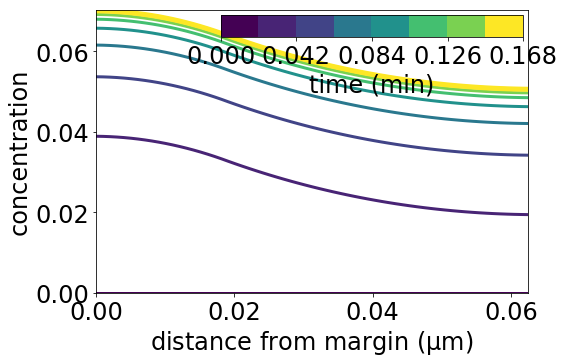

In [58]:
# Create figure and axes objects
fig, ax = plt.subplots(1, 1, squeeze=False)
ax = ax.flatten()
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.tight_layout(pad=10) # padding for space between plots

# Set the font style
plt.rcParams.update({
#     "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif" : "Arial",
    'mathtext.default': 'regular'
})

# Fontsize
myFontsize = 24
myLineWidth = 3

epsilon = 1e-15 # to avoid division by zero when normalizing by volume

y_labels = ["concentration"]


# Loop over the folders
PATH = path_to_files

# Fetch all files in path
fileNames = os.listdir(PATH)
# Filter file name list
fileNames = [file for file in fileNames if 'gradient_' in file]
# Sort file names by number
fileNames = sorted(fileNames, key=get_number)
# fileNames = fileNames[0:-1]

# Determine the overall minimum and maximum iteration
iterations = [int(re.findall(r'\d+', file)[0]) for file in fileNames]
iter_min = np.min(iterations)
iter_max = np.max(iterations)

#     Colormap
#     colormap = plt.cm.get_cmap('viridis', len(iterations))
cmap = plt.cm.get_cmap('viridis', len(iterations)+1)
cbar_min=(float(iter_min)*dt/60.0); cbar_max=(float(iter_max)*dt/60.0); cbar_step=((iterations[1] - iterations[0])*dt/60.0); #assuming equidistant write outs
# bounds = np.arange(cbar_min-0.5*cbar_step, cbar_max+1.5*cbar_step, cbar_step)
bounds = np.arange(cbar_min, cbar_max, cbar_step)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mappable = cm.ScalarMappable(cmap=cmap, norm=norm)

# Set the array for the ScalarMappable object
mappable.set_array(bounds)

# Loop over files and add lines
id_folder = 0
for id_file, file in enumerate(fileNames):
    # Read .csv file and append to list
    df = np.genfromtxt(PATH + file, delimiter=',')  

    # Add a line and specify the color using the ScalarMappable object
#         ax[id_folder].plot(df[j_min:j_max, 0], df[j_min:j_max, 1], color=mappable.to_rgba(iterations[id_file]))
    ax[id_folder].plot(df[j_min:j_max, 0]*dx - y_margin, df[j_min:j_max, 1], 
                       color=mappable.to_rgba(iterations[id_file]*dt/60.0), linewidth=myLineWidth)
    # print("t", id_file, " = ", iterations[id_file]*dt/60.0)

# Add x and y axis limits, labels, and tick-label size
ax[id_folder].set_xlabel('distance from margin ($\mu m$)', fontsize=myFontsize, fontname='Arial')
ax[id_folder].set_ylabel(y_labels[id_folder], fontsize=myFontsize, fontname='Arial')

ax[id_folder].tick_params(axis='both', which='major', labelsize=myFontsize)
ax[id_folder].margins(x=0, y=0)
# ax[id_folder].set_ylim([-0.1,c_max])


# Add the color bar
fig.subplots_adjust(left=0.25)

# Inset
axins1 = inset_axes(ax[id_folder],
                width="70%",  # width = 50% of parent_bbox width
                height="8%",  # height : 5%
                loc='upper right')

ticks = np.arange(cbar_min, cbar_max+cbar_step*2, cbar_step*2)
cbar = fig.colorbar(mappable, axins1, orientation="horizontal", ticks=ticks)
cbar.set_label('time (min)', fontsize=myFontsize, fontname='Arial')
cbar.ax.tick_params(labelsize=myFontsize)
# ax[0].set_xlim(0, 500)

# fig.savefig(path_plot_output + "profile_utotal_and_mass_" + simulation_type + "_" + folder_ID +  ".pdf", bbox_inches = 'tight')

In [59]:
iterations

[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]

In [32]:
cbar_min

0

In [33]:
cbar_max

0

In [34]:
cbar_step

0

In [28]:
iterations[1] - iterations[0]

100

In [35]:
(iterations[1] - iterations[0])*dt

0.0125976